In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
def common_config(font_scale=2.5):
    sns.set(font_scale=font_scale) # font size
    sns.set_style("white", {'axes.facecolor': 'white', 
                        'axes.grid': False,
                        'grid.linewidth': 4.0,
                        'xtick.major.size': 5.0,
                        'ytick.major.size': 5.0
                       })
def common_config_grid():
    sns.set(font_scale=1.8) # fond size
    sns.set_style("white", {'axes.facecolor': 'white', 
                        'axes.grid': True,
                        'axes.linewidth': 2.0,
                        'grid.linestyle': u'--',
                        'grid.linewidth': 4.0,
                        'xtick.major.size': 5.0,
                       })
def common_format(ax):
    # ax.yaxis.label.set_size(23)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xlim(-0.8,1.8)
    return ax

# Motivating Example

In [4]:
# plotting for summary data (original data not saved)
df_mot = pd.read_csv('motivation_result_data.csv')
# remap names
mot_alias = {"adjusted":"Proposed", 
             "unadjusted":"Naive_Random", 
             "exact":"Lee", 
             "nonrand_unadj": "Vanilla"}
df_mot['method'] = df_mot['method'].map(mot_alias)
order = ["Vanilla", "Lee","Proposed"]
df_mot = df_mot.loc[df_mot['method'].isin(order)]
df_mot

,weight const,coverage rate,avg length,method,F1 score,F1 score (post inf),E size,Cond. power,FDP
0,0.2,1.000000,0.320597,Data Splitting,0.400000,0.000000,12,0.5,0.75
1,0.2,0.666667,0.226576,Naive,0.307692,0.250000,18,0.0,0.00
2,0.2,0.875000,0.318019,Approx,0.000000,0.000000,16,0.0,1.00
3,0.2,0.571429,0.366261,Data Splitting,0.545455,0.000000,14,0.0,1.00
4,0.2,0.375000,0.254489,Naive,0.333333,0.000000,16,0.0,1.00
...,...,...,...,...,...,...,...,...,...
1195,0.5,0.000000,0.251425,Naive,0.153846,0.153846,2,1.0,0.00
1196,0.5,1.000000,0.325869,Approx,0.142857,0.153846,4,1.0,0.00
1197,0.5,1.000000,0.315017,Data Splitting,0.222222,0.222222,2,1.0,0.00
1198,0.5,1.000000,0.246929,Naive,0.222222,0.222222,2,1.0,0.00


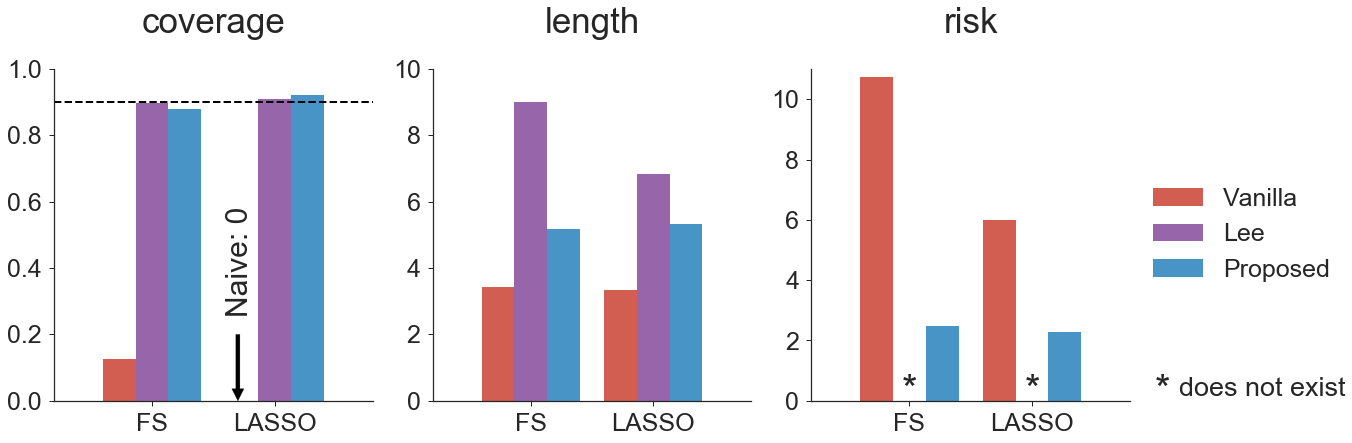

In [167]:
cols = ["#e74c3c", "#9b59b6","#3498db"]

common_config()
fig = plt.figure(figsize=(16,6.3))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

axes = [ax1, ax2, ax3]
quantities = ["coverage", "length", "risk"]
for i in range(3):
    q = quantities[i]
    sns.barplot(x="problem", y=q, hue="method", hue_order = order, data=df_mot, ax=axes[i], palette=cols) 
    axes[i].set_title(q, y=1.09, size=35)
    common_format(axes[i])
    
ax1.legend_.remove()
ax2.legend_.remove()
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax1.set_ylim(0,1)
ax2.set_ylim(0,10)
ax3.set_ylim(0,11)

# customize coverage plot
ax1.axhline(y=0.9, color='k', linestyle='--', linewidth=2)
ann_coord_x = 0.7
ann_coord_y = 0.2
ax1.annotate('', xy=(ann_coord_x, 0), xytext=(ann_coord_x, ann_coord_y),
             arrowprops=dict(facecolor='black'),
            )
ax1.text(ann_coord_x-0.1, ann_coord_y+0.32, 'Naive: 0', fontsize=30, rotation=90)

# customize the risk plot
ann_coord_y = -0.05
ann_coord_offset_x = 0.06
ax3.text(0-ann_coord_offset_x, ann_coord_y, '*', fontsize=40)
ax3.text(1-ann_coord_offset_x, ann_coord_y, '*', fontsize=40)
leg_coord_x = 2.0
ax3.text(leg_coord_x, ann_coord_y, '*', fontsize=40)
ax3.text(leg_coord_x + 0.2, ann_coord_y+0.20, 'does not exist', fontsize=27)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('motivating_example.pdf', format='pdf', bbox_inches='tight')

# Simulated Data Results

Example data files are saved here:

[90  9  8  7  6  5  4  3  2  1]


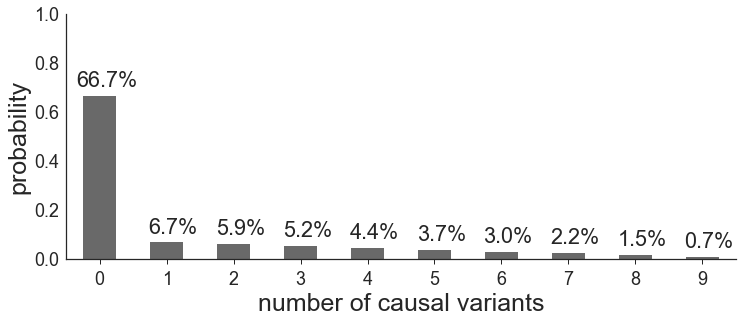

In [86]:
support = np.arange(10)
weight = np.arange(10)[::-1] +1
weight[0] = 90
print(weight)
probs = pd.Series.from_array(weight/np.sum(weight))

sns.set(font_scale=1.8) # fond size
sns.set_style("white", {'axes.facecolor': 'white', 
                        'axes.grid': False,
                        'grid.linewidth': 4.0,
                        'xtick.major.size': 5.0,
                       })

# now to plot the figure...
plt.figure(figsize=(12, 4.5))
ax = probs.plot(kind='bar', color='#696969')
# ax.set_title("Amount Frequency")
ax.set_xlabel("number of causal variants", size = 25)
ax.set_ylabel("probability", size = 25)
ax.set_xticklabels(support, rotation='horizontal')
ax.set_ylim(0,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
rects = ax.patches

# Now make some labels
labels = ["{:.1f}%".format(x) for x in weight/np.sum(weight) * 100]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2 + 0.1, height + 0.02, label, ha='center', va='bottom')

plt.savefig('signal_setup.pdf', format='pdf', bbox_inches='tight')

### Two method comparison: randomized vs non-randomized Lasso

In [80]:
df = pd.read_csv('simulated_data/adjusted_unadjusted_inference_0.10.csv')
print("Result dimension: {}".format(df.shape))
print("Methods: {}".format(np.unique(df['method'])))
print("True signal range: {}".format(np.unique(df['num_true_sigs'])))
def get_correct_power(row):
    if row['method'] == "sel_inf":
        return row['power_rand']
    else:
        return row['power_nonrand']
df['power'] = df.apply(get_correct_power, axis=1) # returns DataFramedf.head()
alias = {"sel_inf":"Proposed", "naive":"Unadjusted"}
order = ["Unadjusted", "Proposed"]
df['method'] = df['method'].map(alias)
df.head()

Result dimension: (27874, 8)
Methods: ['naive' 'sel_inf']
True signal range: [0 1 2 3 4 5 6 7 8 9]


,coverage,gene_name,length,method,num_true_sigs,power_nonrand,power_rand,risk,power
0,1.0,ENSG00000000938.8,3.424028,Unadjusted,0,0.0,0.0,1.832212,0.0
1,0.0,ENSG00000000938.8,3.406765,Unadjusted,0,0.0,0.0,5.419865,0.0
2,1.0,ENSG00000000938.8,3.326958,Unadjusted,0,0.0,0.0,2.077155,0.0
3,0.0,ENSG00000000938.8,3.433514,Unadjusted,0,0.0,0.0,6.204361,0.0
4,0.0,ENSG00000000938.8,3.393807,Unadjusted,0,0.0,0.0,11.652819,0.0


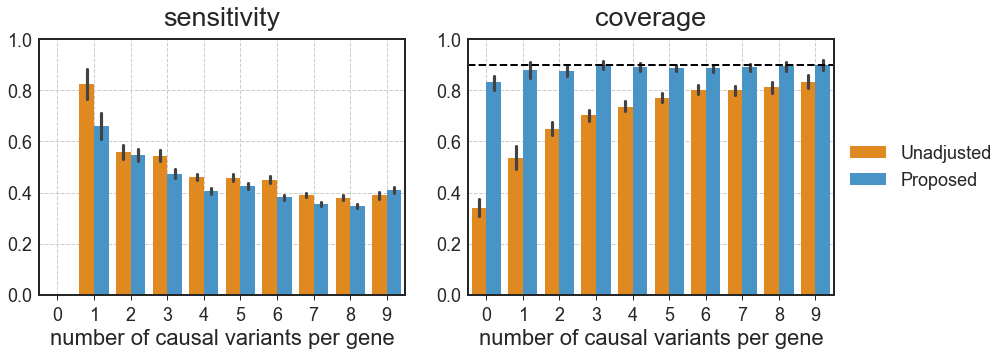

In [81]:
cols = ["#FF8C00", "#3498db"]

def common_format(ax):
    ax.grid(True, which='both')
    ax.set_xlabel('number of causal variants per gene', fontsize=22)
    ax.set_ylabel('', fontsize=22)
    # ax.yaxis.label.set_size(22)
    return ax

# Create a figure instance, and the two subplots
sns.set(font_scale=1.8) # fond size
sns.set_style("white", {'axes.facecolor': 'white', 
                        'axes.grid': True,
                        'axes.linewidth': 2.0,
                        'grid.linestyle': u'--',
                        'grid.linewidth': 4.0,
                        'xtick.major.size': 5.0,
                       })

fig = plt.figure(figsize=(12,5))
ax2 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

sns.barplot(x="num_true_sigs", y="coverage", hue_order = order, hue="method", data=df, ax=ax1, palette=cols) 
sns.barplot(x="num_true_sigs", y="power", hue_order = order, hue="method", data=df, ax=ax2, palette=cols)

ax2.legend_.remove()
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax1.set_ylim(0,1)
ax2.set_ylim(0,1)

common_format(ax1)
common_format(ax2)
ax1.set_title('coverage', y = 1.03, size = 27)
ax2.set_title('sensitivity', y = 1.03, size=27)

# add target coverage on the first plot
ax1.axhline(y=0.9, color='k', linestyle='--', linewidth=2)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('randomization_comparison.pdf', format='pdf', bbox_inches='tight')

## Screening and Inference Result

In [265]:
sim_dir = "/Users/jjzhu/Dropbox/Selective inference EQTLs/results/simulated_data/"
pickle_in = open(sim_dir +"gene_signals.pkl","rb")
true_gene_dict = pickle.load(pickle_in)

true_sig_genes = {}
for g in true_gene_dict:
    if true_gene_dict[g] > 0 :
        true_sig_genes[g] = true_gene_dict[g]
#         print(g)
#         print(true_gene_dict[g])
#         break

signal_true_set = {}
for g in true_gene_dict:
    nsigs = true_gene_dict[g]
    if nsigs not in signal_true_set:
        signal_true_set[nsigs] = []
    signal_true_set[nsigs].append(g)
# now for a given gene set
def get_gene_set(method):
    if method == "Proposed":
        fns = os.listdir("simulated_data/lasso_fdr_randomized")
    if method == "B.L.L.":
        fns = os.listdir("simulated_data/lasso_fdr_nonrandomized")
    if method == "G.V.":
        fns = os.listdir("simulated_data/additional_info_fwdbwd")
    genes = [fn.split("_")[-1].split(".txt")[0] for fn in fns]
    
    return genes
meths = ["G.V.", "B.L.L.", "Proposed"]
genesets = [set(get_gene_set(m)) for m in meths]

FDP_dict = {}
Power_dict = {}
for i,meth in enumerate(meths):
    gset = genesets[i]
    print("Method:  {}".format(meth))
    # compute fdr 
    true_pos = [g for g in gset if g in true_sig_genes ]
    FDP = 1 - 1.0 * len(true_pos) / len(gset)
    print("FDP: {:.4f}, {} out of {} true positives".format(FDP, len(true_pos), len(gset)))
    FDP_dict[meth] = FDP
    meth_power = []
    for nsigs in sorted(list(signal_true_set.keys())):
        # print("{}: {} genes".format(nsigs, len(signal_true_set[nsigs])))
        if nsigs == 0:
            meth_power.append(0)
        else:
            intersect_true_genes = set(signal_true_set[nsigs]).intersection(gset)
            power = 1.0 *  len(intersect_true_genes) / len(signal_true_set[nsigs])
            meth_power.append(power)
    Power_dict[meth] = meth_power
print(FDP_dict)    
print(Power_dict)    

Method:  G.V.
FDP: 0.0437, 1467 out of 1534 true positives
Method:  B.L.L.
FDP: 0.0165, 773 out of 786 true positives
Method:  Proposed
FDP: 0.1119, 1571 out of 1769 true positives
{'G.V.': 0.043676662320730086, 'B.L.L.': 0.01653944020356235, 'Proposed': 0.11192764273600908}
{'G.V.': [0, 0.056016597510373446, 0.13728432108027006, 0.17814113597246128, 0.23852295409181637, 0.2723926380368098, 0.2952815829528158, 0.34151329243353784, 0.3387096774193548, 0.45394736842105265], 'B.L.L.': [0, 0.024204702627939143, 0.056264066016504126, 0.09552495697074011, 0.1217564870259481, 0.1558282208588957, 0.1567732115677321, 0.18609406952965235, 0.21935483870967742, 0.26973684210526316], 'Proposed': [0, 0.06154910096818811, 0.15003750937734434, 0.1884681583476764, 0.23952095808383234, 0.28343558282208586, 0.334855403348554, 0.37627811860940696, 0.3774193548387097, 0.46710526315789475]}


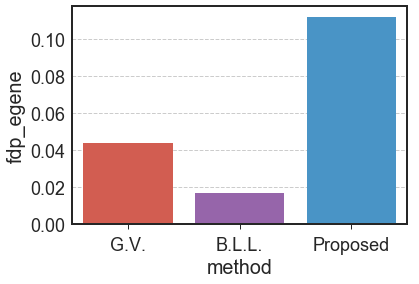

In [283]:
# create a FDP data frame for just 3 bars
# df_fdp_egene = pd.DataFrame(FDP_dict.items(), columns=['method', 'fdp_egene'])
df_fdp_egene = pd.Series(FDP_dict, name='fdp_egene')
df_fdp_egene.index.name = 'method'
df_fdp_egene = df_fdp_egene.reset_index()
order = ["G.V.", "B.L.L.", "Proposed"]
cols = ["#e74c3c","#9b59b6", "#3498db"]


In [168]:
# load data frame
pfxes = ["adjusted", "fwd_bwd", "nonrandomized"] 
headers = ["coverage", "gene_name", "length", "method","num_true_sigs", "risk", "fdr", "fdr_screening", "inferential_power"]
level = 0.10
df = pd.DataFrame()
# load all data 
for pfx in pfxes:
    fn = os.path.join('simulated_data/', "additional_{}_inference_{:.2f}_new.csv".format(pfx, level))
    print(fn)
    df_sub = pd.read_csv(fn)
    if pfx == "fwd_bwd":
        df_sub['method'] = pfx;
    df = df.append(df_sub[headers])
    
order = ["fwd_bwd", "Lee_nonrand", "sel_inf"]
cols = ["#e74c3c", "#9b59b6", "#3498db"]
alias = {"sel_inf":"Proposed", 
         "naive":"Naive", 
         "Lee_nonrand":"B.L.L.",
         "fwd_bwd":"G.V."}
order = [alias[meth] for meth in order]

df['method'] = df['method'].map(alias)

print("Result dimension: {}".format(df.shape))
print("Methods: {}".format(np.unique(df['method'])))
print("True signal range: {}".format(np.unique(df['num_true_sigs'])))
# for the inference result
df_inf = df.loc[df['method'].isin(order)]
print(df_inf.shape)
df_inf = df_inf.loc[df_inf['risk'] < 500]
print(df_inf.shape)
df_inf.head()

simulated_data/additional_adjusted_inference_0.10_new.csv
simulated_data/additional_fwd_bwd_inference_0.10_new.csv
simulated_data/additional_nonrandomized_inference_0.10_new.csv
Result dimension: (19749, 9)
Methods: ['B.L.L.' 'G.V.' 'Proposed']
True signal range: [0 1 2 3 4 5 6 7 8 9]
(19749, 9)
(19742, 9)


,coverage,gene_name,length,method,num_true_sigs,risk,fdr,fdr_screening,inferential_power
0,1.0,ENSG00000138439.10,4.533333,Proposed,9,0.070682,1.0,1.0,0.0
1,1.0,ENSG00000138439.10,4.266667,Proposed,9,1.141943,1.0,1.0,0.0
2,1.0,ENSG00000138439.10,5.066667,Proposed,9,1.832693,1.0,1.0,0.0
3,1.0,ENSG00000138439.10,5.466667,Proposed,9,0.208577,1.0,1.0,0.0
4,1.0,ENSG00000138439.10,5.066667,Proposed,9,0.030727,1.0,1.0,0.0


In [171]:
# number of egenes selected
grouped = df_inf[['method','num_true_sigs','gene_name']].groupby(['method','num_true_sigs'], axis=0)
df_cnt = grouped.agg(lambda x: len(np.unique(x))).reset_index()
df_cnt =df_cnt.rename(columns = {"gene_name": "egene_count"})
print(df_cnt)

      method  num_true_sigs  egene_count
0     B.L.L.              0           13
1     B.L.L.              1           35
2     B.L.L.              2           75
3     B.L.L.              3          111
4     B.L.L.              4          122
5     B.L.L.              5          127
6     B.L.L.              6          103
7     B.L.L.              7           91
8     B.L.L.              8           68
9     B.L.L.              9           41
10      G.V.              0           67
11      G.V.              1           81
12      G.V.              2          183
13      G.V.              3          207
14      G.V.              4          239
15      G.V.              5          222
16      G.V.              6          194
17      G.V.              7          167
18      G.V.              8          105
19      G.V.              9           69
20  Proposed              0          197
21  Proposed              1           89
22  Proposed              2          200
23  Proposed    

In [261]:
# data provided by snigdha
df_power = pd.DataFrame()
for method in order:
    df_method_power = pd.DataFrame().assign(egene_power=Power_dict[method], 
                                            num_true_sigs = np.arange(10))
    df_method_power["method"] = method
    df_power = df_power.append(df_method_power)
# df_power

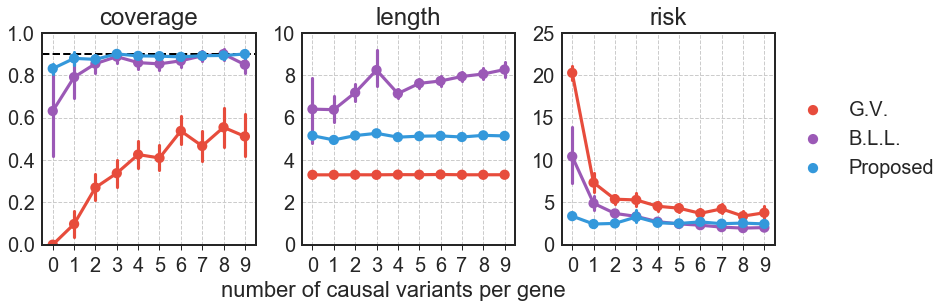

In [262]:
def inference_result():
     # Create a figure instance, and the two subplots
    sns.set(font_scale=2) # fond size
    sns.set_style("white", {'axes.facecolor': 'white', 
                            'axes.grid': True,
                            'axes.linewidth': 2.0,
                            'grid.linestyle': u'--',
                            'grid.linewidth': 4.0,
                            'xtick.major.size': 5.0,
                           })

    fig = plt.figure(figsize=(11,4))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)

    sns.pointplot(x="num_true_sigs", y="coverage", hue_order=order, markers='o', hue="method", data=df_inf, ax=ax1, palette=cols) 
    sns.pointplot(x="num_true_sigs", y="length",   hue_order=order,  markers='o', hue="method", data=df_inf, ax=ax2, palette=cols)
    sns.pointplot(x="num_true_sigs", y="risk",     hue_order=order,  markers='o', hue="method", data=df_inf, ax=ax3, palette=cols)

    ax1.set_title("coverage", y = 1.01)
    ax2.set_title("length", y = 1.01)
    ax3.set_title("risk", y = 1.01)

    ax1.legend_.remove()
    ax2.legend_.remove()
    ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    ax1.set_ylim(0,1)
    ax2.set_ylim(0,10)
    ax3.set_ylim(0,25)

    def common_format(ax):
        ax.grid(True, which='both')
        ax.set_xlabel('', fontsize=22)
        # ax.yaxis.label.set_size(22)
        ax.set_ylabel('', fontsize=22)
        return ax

    common_format(ax1)
    common_format(ax2)
    common_format(ax3)
    fig.text(0.5, -0.04, 'number of causal variants per gene', fontsize=22, ha='center')


    # add target coverage on the first plot
    ax1.axhline(y=0.9, color='k', linestyle='--', linewidth=2)

    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.savefig('inference_comparison_{:.2f}.pdf'.format(level), format='pdf', bbox_inches='tight')
inference_result()

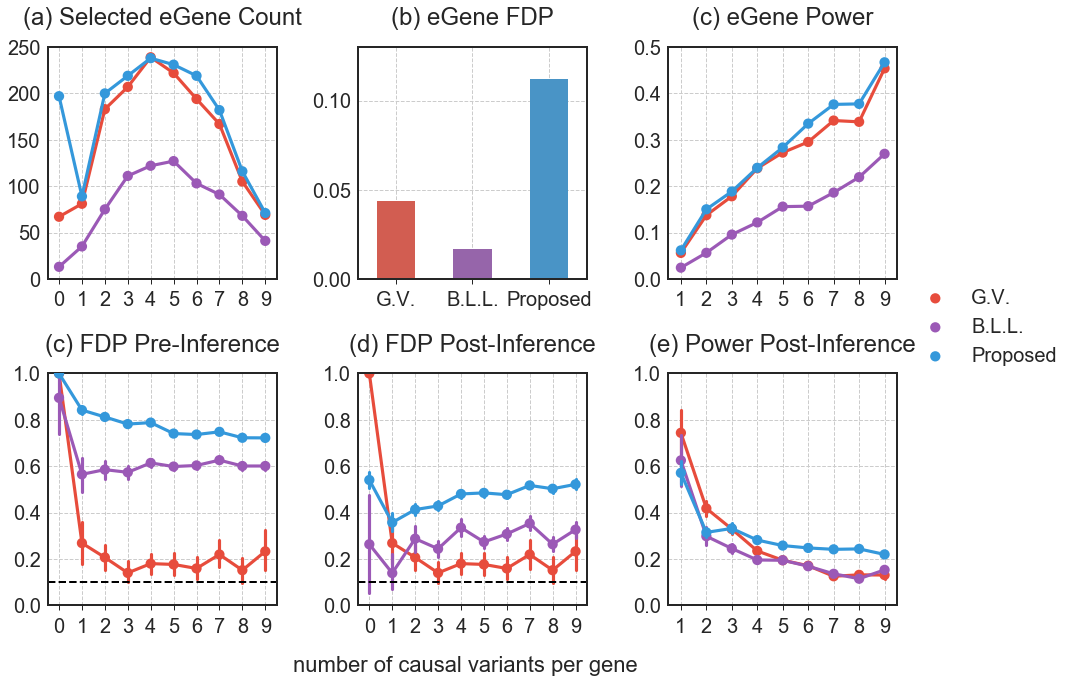

In [301]:
def selection_result():
    # Create a figure instance, and the two subplots
    sns.set(font_scale=2) # fond size
    sns.set_style("white", {'axes.facecolor': 'white', 
                            'axes.grid': True,
                            'axes.linewidth': 2.0,
                            'grid.linestyle': u'--',
                            'grid.linewidth': 4.0,
                            'xtick.major.size': 5.0,
                           })
    title_position_y = 1.07
    title_position_x = -1
    fig = plt.figure(figsize=(13,9))
    
    for i, ax in enumerate([fig.add_subplot(231),
                            fig.add_subplot(232),
                            fig.add_subplot(233)]):
        if i == 0:
            title = "(a) Selected eGene Count"
            keep_legend = False
            max_y = 250
            sns.pointplot(x="num_true_sigs", 
                    y="egene_count", 
                    hue_order = order, 
                    hue="method", 
                    data=df_cnt, 
                    ax=ax, 
                    palette=cols) 
            ax.legend_.remove()
        if i == 1:
            title = "(b) eGene FDP"
            keep_legend = False
            max_y = 0.13
            sns.barplot(x="method", 
                        y="fdp_egene", 
                        order = order, 
                        data=df_fdp_egene, 
                        ax=ax,
                        palette=cols) 
            # ax.set_xlim(-1,3)
            newwidth=0.5
            for bar in ax.patches:
                x = bar.get_x()
                width = bar.get_width()
                centre = x+width/2.
                bar.set_x(centre-newwidth/2.)
                bar.set_width(newwidth)

        if i == 2:
            title = "(c) eGene Power"
            max_y = 0.5
            keep_legend = False
            # remove zero
            df_power_rm_0 = df_power[df_power.num_true_sigs !=0]
            sns.pointplot(x="num_true_sigs", 
                    y="egene_power", 
                    hue_order = order, 
                    hue="method", 
                    data=df_power_rm_0, 
                    ax=ax, 
                    palette=cols) 
            ax.legend_.remove()
        ax.set_ylim(0,max_y) 
        ax.grid(True, which='both')
        ax.set_xlabel('', fontsize=22)
        ax.set_ylabel('', fontsize=22)
        ax.set_title(title, 
                     y = title_position_y)
                

    axes = [fig.add_subplot(234), 
            fig.add_subplot(235),
            fig.add_subplot(236)]
    for i, ax in enumerate(axes):
        if i == 0:
            title = "(c) FDP Pre-Inference"
            var_name = "fdr_screening"
            keep_legend = False
            show_line = True
            df_plot = df_inf
        if i == 1:
            title = "(d) FDP Post-Inference"
            var_name = "fdr"
            keep_legend = False
            df_plot = df_inf
        if i == 2:
            title = "(e) Power Post-Inference"
            var_name = "inferential_power"
            keep_legend = True
            show_line = False
            df_plot = df_inf[df_inf.num_true_sigs != 0]
        
        sns.pointplot(x="num_true_sigs", 
                      y=var_name, 
                      hue_order=order, 
                      markers='o', 
                      hue="method", 
                      data=df_plot, 
                      ax=ax, 
                      palette=cols) 
        if keep_legend:
            ax.legend(loc='center left', bbox_to_anchor=(1, 1.2))
        else:
            ax.legend_.remove()
        if show_line:
            ax.axhline(y=0.1, color='k', linestyle='--', linewidth=2)
        ax.set_title(title, 
                     y = title_position_y)
        ax.set_ylim(0,1)
        ax.grid(True, which='both')
        ax.set_xlabel('', fontsize=22)
        ax.set_ylabel('', fontsize=22)
        
    fig.text(0.5, -0.04, 'number of causal variants per gene', fontsize=22, ha='center')

    # add target coverage on the first plot
    plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=1.0)
    plt.savefig('inference_comparison_fdr_power_{:.2f}.pdf'.format(level), format='pdf', bbox_inches='tight')
selection_result()

In [132]:
# number of evariants reported by each method
def get_sub_data(method, num_vars_egenes=False):
    if method == "Proposed":
        pfx = "adjusted"
    if method == "Lee Exact":
        pfx = "nonrandomized"
    if method == "Vanilla":
        pfx = "fwd_bwd"

    level = 0.10
    fn = os.path.join('simulated_data/', "additional_{}_inference_{:.2f}_new.csv".format(pfx, level))
    # print(fn)
    df_sub = pd.read_csv(fn)
    if pfx == "fwd_bwd":
        df_sub['method'] = pfx;
        
    if num_vars_egenes:
        # count the number of variants per egenes
        grouped = df_sub[['method','num_true_sigs','gene_name']].groupby(['method','num_true_sigs','gene_name'], axis=0)
        df_cnt = grouped.agg(lambda x: len(x)).reset_index()
        df_cnt =df_cnt.rename(columns = {0: "evariant_count"})
        df_cnt = df_cnt.set_index('gene_name')
        # print(df_cnt.head())
        return(df_cnt)
    return(df_sub)

df = pd.DataFrame()
for i, method in enumerate(meths):
    df_sub = get_sub_data(method, num_vars_egenes=True)
    geneset = genesets[i]
    print("Total number of genes with {}: {}".format(method, len(geneset)))
    sum_variants = 0
    for gene in geneset:
        if gene in df_sub.index:
            sum_variants += df_sub.loc[gene]["evariant_count"]
    avg_var_per_gene = 1.0 * sum_variants / len(geneset)
    print("Average number of variants per gene: {:.3f}\n".format(avg_var_per_gene))
    # headers = ["coverage", "gene_name", "length", "method","num_true_sigs", "risk", "fdr", "fdr_screening", "inferential_power"]
    df = df.append(df_sub)
df.head()

Total number of genes with Vanilla: 1534
Average number of variants per gene: 1.080

Total number of genes with Proposed: 1769
Average number of variants per gene: 7.871

Total number of genes with Lee Exact: 786
Average number of variants per gene: 5.304


,method,num_true_sigs,evariant_count
gene_name,,,
ENSG00000006114.11,fwd_bwd,0,1
ENSG00000006451.3,fwd_bwd,0,1
ENSG00000008394.8,fwd_bwd,0,1
ENSG00000014138.4,fwd_bwd,0,1
ENSG00000042753.7,fwd_bwd,0,1


In [160]:
method = "Proposed"
df_sub = get_sub_data(method, num_vars_egenes=True)
tot_n_genes = len()
df_sub.loc["ENSG00000000938.8"]

NameError: name 'get_sub_data' is not defined

## Real Data Results


/scratch/PI/sabatti/controlled_access_data/fastqtl_tmp/Liver/Liver_97_chunk*_mtx/result_fwdbwd/

In [161]:
# load data frame
pfxes = ["real_adjusted_unadjusted", "real_fwd_bwd", "real_nonrandomized"] 
level = 0.10
df = pd.DataFrame()
# load all data
for pfx in pfxes:
    fn = os.path.join('real_data/', "{}_inference_{:.2f}.csv".format(pfx, level))
    print(fn)
    df_sub = pd.read_csv(fn)
    if pfx == "real_fwd_bwd":
        df_sub['method'] = "fwd_bwd";
    df = df.append(df_sub)
    
print("Result dimension: {}".format(df.shape))
print("Methods: {}".format(np.unique(df['method'])))
df.head()

real_data/real_adjusted_unadjusted_inference_0.10.csv
real_data/real_fwd_bwd_inference_0.10.csv
real_data/real_nonrandomized_inference_0.10.csv
Result dimension: (81644, 8)
Methods: ['Lee_nonrand' 'fwd_bwd' 'naive' 'naive_nonrand' 'sel_inf']


,gene_name,length,lower_ci,method,norm,nsignificant,point_estimator,upper_ci
0,ENSG00000000419.8,2.850438,-6.091220,naive,9.711346,0.857143,-4.425719,-2.760217
1,ENSG00000000419.8,3.738507,0.051952,naive,9.711346,0.857143,1.754110,3.456269
2,ENSG00000000419.8,3.181063,-3.844597,naive,9.711346,0.857143,-2.145222,-0.445846
3,ENSG00000000419.8,3.911785,1.326563,naive,9.711346,0.857143,2.997886,4.669209
4,ENSG00000000419.8,2.827835,-6.339845,naive,9.711346,0.857143,-4.629143,-2.918441


In [162]:
# for the inference result
alias = {"sel_inf":"Proposed", 
         "naive":"Naive", 
         "Lee_nonrand":"B.L.L.",
         "fwd_bwd":"G.V.",
         "naive_nonrand":"Lee_naive"}
order = ["G.V.", "B.L.L.", "Proposed"]
df['method'] = df['method'].map(alias)
df_inf = df.loc[df['method'].isin(order)]
df_inf.head()

,gene_name,length,lower_ci,method,norm,nsignificant,point_estimator,upper_ci
7,ENSG00000000419.8,4.8,-6.200000,Proposed,7.548489,0.285714,-4.396180,-2.333333
8,ENSG00000000419.8,4.8,-2.533333,Proposed,7.548489,0.285714,-0.010443,2.600000
9,ENSG00000000419.8,4.8,-3.400000,Proposed,7.548489,0.285714,-1.025701,1.800000
10,ENSG00000000419.8,4.8,-0.466667,Proposed,7.548489,0.285714,1.931675,4.333333
11,ENSG00000000419.8,4.8,-6.933333,Proposed,7.548489,0.285714,-5.066939,-2.933333


In [163]:
grouped = df_inf[['method','nsignificant','gene_name']].groupby(['method','gene_name'], axis=0)
df_cnt = grouped.sum().reset_index()
print(df_cnt.head())
# print(df_cnt.loc[df_cnt['nsignificant']==0.0])

grouped_tmp = df_cnt[['method','gene_name']].groupby(['method'], axis=0)
df_cnt_tmp = grouped_tmp.agg(lambda x: len(np.unique(x))).reset_index()
df_cnt_tmp =df_cnt_tmp.rename(columns = {"gene_name": "egene_count"})
df_cnt_tmp.head()

   method           gene_name  nsignificant
0  B.L.L.  ENSG00000001461.12           2.0
1  B.L.L.  ENSG00000002726.15           4.0
2  B.L.L.  ENSG00000002919.10           1.0
3  B.L.L.   ENSG00000002933.3           4.0
4  B.L.L.  ENSG00000003147.13           4.0


,method,egene_count
0,B.L.L.,1395
1,G.V.,1829
2,Proposed,2213


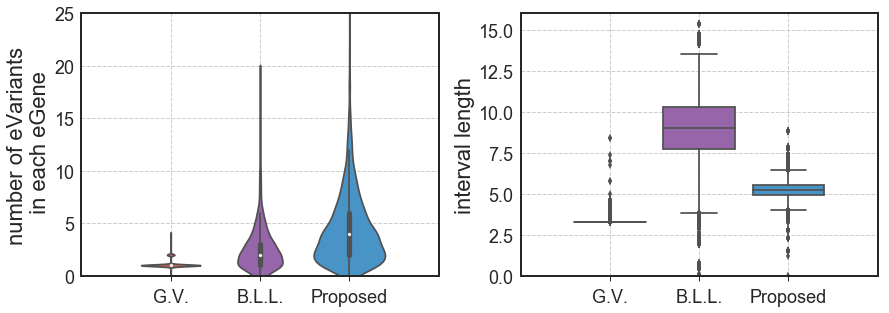

In [164]:
cols = ["#e74c3c","#9b59b6", "#3498db"]

def common_format(ax):
    newwidth=0.4
    ax.grid(True, which='both')
    ax.set_xlabel('')
    ax.yaxis.label.set_size(22)
    ax.set_xlim(-1,3)
    for bar in ax.patches:
        x = bar.get_x()
        width = bar.get_width()
        centre = x+width/2.
        bar.set_x(centre-newwidth/2.)
        bar.set_width(newwidth)
    return ax
common_config_grid()

fig = plt.figure(figsize=(13,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.violinplot(x="method", y="nsignificant", scale="count", order = order, data=df_cnt, ax=ax1, palette=cols) 
common_format(ax1)
ax1.set_ylim(0,25)
ax1.set_ylabel('number of eVariants\n in each eGene')

sns.boxplot(x="method", y="length", order = order, data=df_inf, ax=ax2, palette=cols)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
common_format(ax2)
ax2.set_ylim(0,16)
ax2.set_ylabel('interval length')

plt.tight_layout(pad=1.4, w_pad=0.5, h_pad=1.0)
plt.savefig('real_inference_comparison_{:.2f}.pdf'.format(level), format='pdf', bbox_inches='tight')

In [13]:
df_cnt[['method', 'nsignificant']].groupby('method', axis=0).mean()

,nsignificant
method,
Lee Exact,2.691039
Proposed,4.392680
Vanilla,1.123565


In [7]:
pfxes = ["proposed", "fwd_bwd"] 
level = 0.05
df = pd.DataFrame()
# load all data
for pfx in pfxes:
    fn = os.path.join('real_data/', "effect_sizes_{}_{:.2f}.csv".format(pfx, level))
    print(fn)
    df_sub = pd.read_csv(fn)
    df = df.append(df_sub)
    
print("Result dimension: {}".format(df.shape))
print("Methods: {}".format(np.unique(df['method'])))
alias = {"sel_inf":"Proposed","fwd_bwd":"Vanilla"}
df['method'] = df['method'].map(alias)
df = df.loc[df["MAF"]<0.1]
df_Adjusted = df.loc[df["method"] == "Proposed"]
df_Aguet = df.loc[df["method"] == "Vanilla"]
df.head()


real_data/effect_sizes_proposed_0.05.csv
real_data/effect_sizes_fwd_bwd_0.05.csv
Result dimension: (9265, 6)
Methods: ['fwd_bwd' 'sel_inf']


,MAF,SNP_index,eVariant,effect_size,gene_name,method
10,0.092784,3198.0,7_150498245_T_C_b37,-6.062165,ENSG00000002933.3,Proposed
14,0.056701,5007.0,7_151223222_A_AT_b37,3.721242,ENSG00000002933.3,Proposed
22,0.087629,3424.0,7_8317212_G_T_b37,3.292354,ENSG00000003147.13,Proposed
26,0.087629,6668.0,7_9199559_G_A_b37,-5.414005,ENSG00000003147.13,Proposed
29,0.077320,2706.0,X_119440304_G_A_b37,-3.001054,ENSG00000005022.5,Proposed


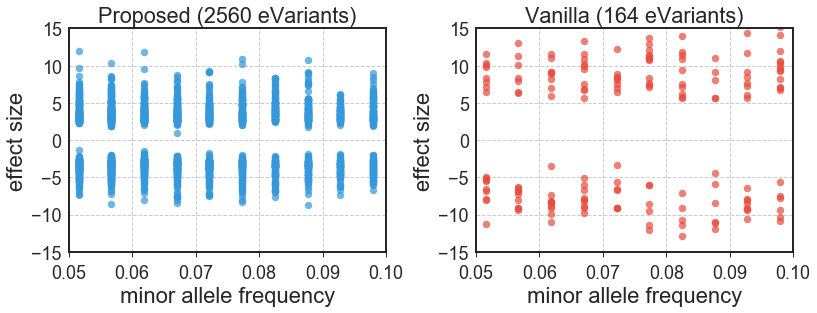

In [8]:
cols = ["#3498db","#e74c3c"]
sns.set(font_scale=1.8) # fond size
sns.set_style("white", {'axes.facecolor': 'white', 
                        'axes.grid': True,
                        'axes.linewidth': 2.0,
                        'grid.linestyle': u'--',
                        'grid.linewidth': 4.0,
                        'xtick.major.size': 5.0,
                       })

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(df_Adjusted['MAF'], df_Adjusted['effect_size'], s= 50, 
            color=cols[0], edgecolors=cols[0], alpha=0.7)
ax2.scatter(df_Aguet['MAF'], df_Aguet['effect_size'], s= 50,
            color=cols[1], edgecolors=cols[1], alpha=0.7)

def common_format(ax):
    fontsize=22
    ax.set_xlabel('minor allele frequency', fontsize=fontsize)
    ax.set_ylabel('effect size', fontsize=fontsize)
    ax.set_xlim(0.05, 0.10)
    ax.set_ylim(-15, 15)
    return ax

def set_title(method):
    num_vars = np.sum(df['method']==method)
    return "{} ({} eVariants)".format(method, num_vars)
    

common_format(ax1)
common_format(ax2)

ax1.set_title(set_title('Proposed'))
ax2.set_title(set_title('Vanilla'))

plt.tight_layout(pad=1.4, w_pad=0.5, h_pad=1.0)
plt.savefig('effect_size_comparison_{:.2f}.pdf'.format(level), format='pdf', bbox_inches='tight')

## Venn Diagrams for the Real Data Results

In [46]:
# all significant pairs
gtex_sig_pairs = pd.read_csv("gtex_v6p/Liver_Analysis.v6p.signif_snpgene_pairs.txt",
                             delimiter="\t")
gtex_sig_pairs.head()


,variant_id,gene_id,tss_distance,pval_nominal,slope,slope_se,slope_fpkm,slope_fpkm_se,pval_nominal_threshold,min_pval_nominal,pval_beta
0,1_736289_T_A_b37,ENSG00000225880.4,-26613,2.502920e-06,0.698593,0.137054,0.883988,0.152335,0.000026,8.824350e-10,0.000003
1,1_739528_G_A_b37,ENSG00000225880.4,-23374,1.167120e-07,-0.862142,0.147173,-1.057440,0.164515,0.000026,8.824350e-10,0.000003
2,1_752566_G_A_b37,ENSG00000225880.4,-10336,6.284180e-06,-0.511881,0.105327,-0.601594,0.120702,0.000026,8.824350e-10,0.000003
3,1_752721_A_G_b37,ENSG00000225880.4,-10181,4.388450e-06,-0.506707,0.102302,-0.598980,0.116971,0.000026,8.824350e-10,0.000003
4,1_752796_C_T_b37,ENSG00000225880.4,-10106,5.904290e-09,0.998134,0.151952,1.282070,0.162615,0.000026,8.824350e-10,0.000003


In [141]:
# check information
test = pd.read_csv("real_data/Liver_97_genes_simes_BH.txt",
# test = pd.read_csv("simulated_data//Liver_97_genes_simes_BH.txt",
                   delimiter="\t")
test.head()

,gene_name,num_vars,simes_pval,bh_adjusted,selected
0,ENSG00000227232.4,830,0.227272,0.798704,0
1,ENSG00000238009.2,1211,0.990969,1.000000,0
2,ENSG00000237683.5,1257,0.999028,1.000000,0
3,ENSG00000239906.1,1258,0.997137,1.000000,0
4,ENSG00000228463.4,1581,0.413755,1.000000,0


In [142]:
np.sum(test['selected'])

1553

In [143]:
np.sum(test['bh_adjusted']<0.10)

1831

In [140]:
np.sum(test['bh_adjusted']<0.05)

981

In [122]:
# now load all the egenes and get the main set
df_randomized = pd.DataFrame()
exp = "nonrandomized"
for i in range(100):
    if (i == 41):
        continue
    fn = "simulated_data/"+exp+"_egene_boninfo/nonrandomized_Z_bon{:03d}.txt".format(i+1)
    bonf_pvals = pd.read_csv(fn, header=None, delimiter=" ")[2]
    fn = "simulated_data/"+exp+"_egene_names/egenes_{:03d}.txt".format(i+1)
    egene_names = pd.read_csv(fn, header=None)
    df_randomized = df_randomized.append(egene_names)
print(df_randomized.shape)
print(df_randomized.head())

(1089, 1)
                    0
0   ENSG00000237757.1
1  ENSG00000125675.13
2   ENSG00000230162.1
3   ENSG00000213397.6
4   ENSG00000260081.1


In [130]:
# check intersections 
fwdbwd = test.loc[test['bh_adjusted']<0.10]['gene_name']
inter = len(list(set(fwdbwd) & set(df_randomized[0])))
print("my selection: {}".format((fwdbwd.shape[0])))
print("your selection: {}".format(df_randomized.shape[0]))
print("intersection: {}".format(inter))

my selection: 1535
your selection: 1089
intersection: 11


In [127]:
set(df_randomized)

{0}

In [162]:
# compare the egene selection between proposed and just simes (in vanilla)
proposed_egenes_05 = pd.read_csv("real_data/randomized_eGenes_05.txt", header=None)
proposed_egenes_10 = pd.read_csv("real_data/randomized_eGenes_10.txt", header=None)
df = pd.read_csv("real_data/Liver_97_genes_simes_BH.txt", delimiter="\t")
simes_egenes_05 = df.loc[df['bh_adjusted'] < 0.05]['gene_name']
simes_egenes_10 = df.loc[df['bh_adjusted'] < 0.10]['gene_name']

In [163]:
int_set_05 = list(set(simes_egenes_05) & set(proposed_egenes_05[0]))
print("my simes selection: {}".format(len(simes_egenes_05)))
print("your proposed randomized selection: {}".format(len(proposed_egenes_05)))
print("intersection: {}".format(len(int_set_05)))

my simes selection: 1553
your proposed randomized selection: 1762
intersection: 1420


In [164]:
int_set_10 = list(set(simes_egenes_10) & set(proposed_egenes_10[0]))
print("my simes selection: {}".format(len(simes_egenes_10)))
print("your proposed randomized selection: {}".format(len(proposed_egenes_10)))
print("intersection: {}".format(len(int_set_10)))

my simes selection: 1831
your proposed randomized selection: 2216
intersection: 1683


In [165]:
len(set(simes_egenes_10) & set(simes_egenes_05))

1553

In [166]:
len(set(proposed_egenes_05[0]) & set(proposed_egenes_10[0]))

1762

# MAF Continued

In [70]:
fdr_level = 0.10
df = pd.read_csv("real_data/real_wMAF_adjusted_unadjusted_inference_{:.2f}.csv".format(fdr_level))
alias = {"naive": "Unadjusted", "sel_inf": "Proposed"}
df["method"] = df["method"].map(alias)
df["variant"] = df["gene_name"] + "__" + df["SNP_index"].map(str)
df = df[["MAF", "variant", "point_estimator", "method"]]
es = df.pivot(index="variant", columns="method")["point_estimator"]
maf = df.pivot(index="variant", columns="method")["MAF"]["Proposed"]
df_es_maf = es.assign(MAF = maf)
df_es_maf.head()

method,Proposed,Unadjusted,MAF
variant,,,
ENSG00000000419.8__1038,-4.396180,-4.425719,0.056701
ENSG00000000419.8__1351,-0.010443,1.754110,0.067010
ENSG00000000419.8__2045,-1.025701,-2.145222,0.072165
ENSG00000000419.8__2229,1.931675,2.997886,0.051546
ENSG00000000419.8__2713,-5.066939,-4.629143,0.082474


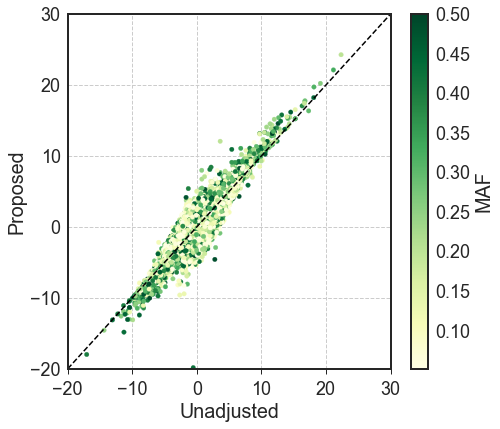

In [71]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111)
common_config_grid()
df_es_maf.plot.scatter(x="Unadjusted", y="Proposed", c="MAF", ax = ax, colormap="YlGn")
ax.set_xlim(-20, 30)
ax.set_ylim(-20, 30)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x,  color='k', linestyle='--', linewidth=1.5)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('MAF_adjusted_unadjusted_{:.2f}.pdf'.format(fdr_level), format='pdf', bbox_inches='tight')

In [ ]:
# now to plot the figure...
ax = probs.plot(kind='bar', color='#696969')
# ax.set_title("Amount Frequency")
ax.set_xlabel("number of signals")
ax.set_ylabel("probability")
ax.set_xticklabels(support, rotation='horizontal')
ax.set_ylim(0,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
rects = ax.patches

# Now make some labels
labels = ["{:.1f}%".format(x) for x in weight/np.sum(weight) * 100]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2 + 0.1, height + 0.02, label, ha='center', va='bottom')

plt.savefig('signal_setup.pdf', format='pdf', bbox_inches='tight')

## Venn Diagrams

In [108]:
from matplotlib_venn import venn3, venn2

def load_vanilla_egenes(setting, fdr):
    # return the egenes as a set
    if setting == "simulation":
        fn = "simulated_data/Liver_97_genes_simes_BH.txt"
    elif setting == "real": 
        fn = "real_data/Liver_97_genes_simes_BH.txt"
    else:
        assert 0, "Setting '{}' not recognized".format(setting)
    df = pd.read_csv(fn, delimiter="\t")
    # the bh-adjusted p-values here orginially simes p-values
    gene_set = set(df.loc[df['bh_adjusted'] < fdr]['gene_name'])
    print("Setting: {}; FDR level: {}".format(setting, fdr))
    print("Number of eGenes for vanilla : {}".format(len(gene_set)))
    print("")
    return gene_set

vanilla = load_vanilla_egenes('real', fdr=0.05)
vanilla = load_vanilla_egenes('real', fdr=0.10)
vanilla = load_vanilla_egenes('simulation', fdr=0.05)
vanilla = load_vanilla_egenes('simulation', fdr=0.10)

def load_egenes(setting, fdr, method):
    if fdr == 0.05:
        postfix = "05"
    elif fdr == 0.10:
        postfix = "10"
    else:
        assert 0, "The level {} is not currently supported".format(fdr)
    if setting == "real":
        fn = "real_data/{}_eGenes_{}.txt".format(method, postfix)
        df = pd.read_csv(fn, header=None)
        gene_set =  set(df[0])
    elif setting == "simulation":
        fn = "simulated_data/{}_eGenes_{}.txt".format(method, postfix)
        
    print("Setting: {}; FDR level: {}".format(setting, fdr))
    print("Number of eGenes for {} : {}".format(method, len(gene_set)))
    print("")
    return gene_set

proposed = load_egenes('real', 0.05, "randomized")
proposed = load_egenes('real', 0.10, "randomized")
# proposed = load_egenes('real', 0.05, "nonrandomized")
proposed = load_egenes('real', 0.10, "nonrandomized")

def load_gtex_egenes(fdr):
    setting = "real"
    fn = "gtex_v6p/Liver_Analysis.v6p.egenes.txt"
    df = pd.read_csv(fn, delimiter="\t")
    gene_set = set(df.loc[df['qval'] < fdr]['gene_id'])
    print("Setting: {}; FDR level: {}".format(setting, fdr))
    print("Number of eGenes for GTEx : {}".format(len(gene_set)))
    print("")    
    return gene_set

gtex = load_gtex_egenes(0.05)
gtex = load_gtex_egenes(0.10)

Setting: real; FDR level: 0.05
Number of eGenes for vanilla : 1553

Setting: real; FDR level: 0.1
Number of eGenes for vanilla : 1831

Setting: simulation; FDR level: 0.05
Number of eGenes for vanilla : 981

Setting: simulation; FDR level: 0.1
Number of eGenes for vanilla : 1535

Setting: real; FDR level: 0.05
Number of eGenes for randomized : 1762

Setting: real; FDR level: 0.1
Number of eGenes for randomized : 2216

Setting: real; FDR level: 0.1
Number of eGenes for nonrandomized : 1395

Setting: real; FDR level: 0.05
Number of eGenes for GTEx : 1644

Setting: real; FDR level: 0.1
Number of eGenes for GTEx : 2146


In [109]:
grouped = df_inf[['method','gene_name']].groupby(['method'], axis=0)
df_cnt = grouped.agg(lambda x: len(np.unique(x))).reset_index()
df_cnt =df_cnt.rename(columns = {"gene_name": "egene_count"})
print(df_cnt.head())

     method  egene_count
0    B.L.L.          786
1      G.V.         1534
2  Proposed         1762


### Real data eGenes

Setting: real; FDR level: 0.1
Number of eGenes for vanilla : 1831

Setting: real; FDR level: 0.1
Number of eGenes for randomized : 2216

Setting: real; FDR level: 0.1
Number of eGenes for GTEx : 2146

Setting: real; FDR level: 0.1
Number of eGenes for nonrandomized : 1395


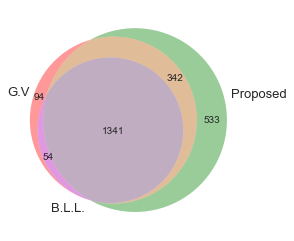

In [128]:
fdr_level = 0.10
setting = "real"
vanilla = load_vanilla_egenes(setting, fdr_level)
proposed = load_egenes(setting, fdr_level, "randomized")
gtex = load_gtex_egenes(fdr_level)
lee = load_egenes(setting, fdr_level, "nonrandomized")

fz = 10

common_config(font_scale=0.9)
vd = venn3([vanilla, proposed, lee], ["G.V", "Proposed", "B.L.L."])

def update_position(area, offset_x, offset_y):
    lab = vd.get_label_by_id(area)
    lab.set_fontsize(fz)
    lab.set_position((lab.get_position()[0] + offset_x, lab.get_position()[1] + offset_y))
    
def update_label(index, offset_x, offset_y):
    lab = vd.set_labels[index]
    lab.set_position((lab.get_position()[0] + offset_x, lab.get_position()[1] + offset_y))


update_position("111", -0.2, -0.1)
update_position("110", 0, 0.16)
update_position("101", 0.01, 0)
update_position("100", 0., 0.15)
update_position("010", 0., 0)

update_label(2, -0.25, 0.05)
update_label(1, 0.30, -0.41)
update_label(0, -0.25, -0.35)


plt.savefig('real_egene_venn_{:.2f}.pdf'.format(fdr_level), format='pdf', bbox_inches='tight')

In [93]:
vanilla

{'ENSG00000225101.3',
 'ENSG00000256383.1',
 'ENSG00000163006.7',
 'ENSG00000254685.2',
 'ENSG00000138111.10',
 'ENSG00000026025.9',
 'ENSG00000169217.4',
 'ENSG00000154803.8',
 'ENSG00000087085.9',
 'ENSG00000159733.9',
 'ENSG00000247796.2',
 'ENSG00000103404.10',
 'ENSG00000157315.4',
 'ENSG00000225880.4',
 'ENSG00000196132.7',
 'ENSG00000225527.1',
 'ENSG00000167103.7',
 'ENSG00000150316.7',
 'ENSG00000197261.7',
 'ENSG00000134250.13',
 'ENSG00000130653.11',
 'ENSG00000130150.7',
 'ENSG00000262003.1',
 'ENSG00000110076.14',
 'ENSG00000185627.13',
 'ENSG00000115275.7',
 'ENSG00000056736.5',
 'ENSG00000231389.3',
 'ENSG00000180481.6',
 'ENSG00000251468.2',
 'ENSG00000046647.9',
 'ENSG00000253540.1',
 'ENSG00000101216.6',
 'ENSG00000136710.5',
 'ENSG00000272279.1',
 'ENSG00000225765.1',
 'ENSG00000226383.1',
 'ENSG00000163239.8',
 'ENSG00000166140.13',
 'ENSG00000123201.10',
 'ENSG00000103168.12',
 'ENSG00000235903.3',
 'ENSG00000167646.9',
 'ENSG00000257176.1',
 'ENSG00000272501.1',
 

## Simulated Data Result

In [89]:
fdr_level = 0.10
setting = "simulation"
vanilla = load_vanilla_egenes(setting, fdr_level)
proposed = load_egenes(setting, fdr_level, "randomized")
gtex = load_gtex_egenes(fdr_level)
lee = load_egenes(setting, fdr_level, "nonrandomized")

fz = 10

common_config(font_scale=0.9)
vd = venn3([vanilla, proposed, lee], ["Vanilla Simes", "Randomized Bonforreni", "Vanilla Bonforreni"])

def update_position(area, offset_x, offset_y):
    lab = vd.get_label_by_id(area)
    lab.set_fontsize(fz)
    lab.set_position((lab.get_position()[0] + offset_x, lab.get_position()[1] + offset_y))
    
def update_label(index, offset_x, offset_y):
    lab = vd.set_labels[index]
    lab.set_position((lab.get_position()[0] + offset_x, lab.get_position()[1] + offset_y))


update_position("111", -0.2, -0.1)
update_position("110", 0, 0.16)
update_position("101", 0.01, 0)
update_position("100", 0., 0.15)
update_position("010", 0., 0)

update_label(2, -0.4, 0.05)
update_label(1, 0.05, -0.05)


plt.savefig('real_egene_venn_{:.2f}.pdf'.format(fdr_level), format='pdf', bbox_inches='tight')

Setting: simulation; FDR level: 0.1
Number of eGenes for vanilla : 1535


FileNotFoundError: File b'simulated_data/randomized_eGenes_10.txt' does not exist

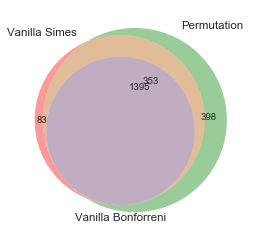

In [22]:
venn3([vanilla, gtex, lee], ["Vanilla Simes", "Permutation", "Vanilla Bonforreni"])


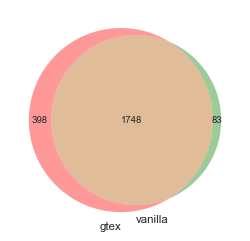

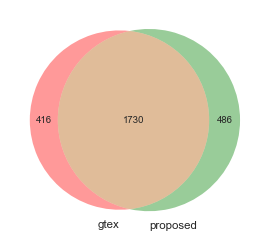

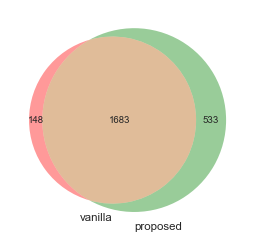

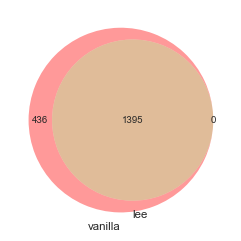

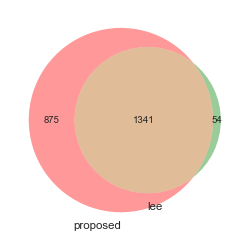

In [16]:
venn2([gtex, vanilla], ["gtex", "vanilla"])
plt.show()
venn2([gtex, proposed], ["gtex", "proposed"])
plt.show()
venn2([vanilla, proposed], ["vanilla", "proposed"])
plt.show()
venn2([vanilla, lee], ["vanilla", "lee"])
plt.show()
venn2([proposed, lee], ["proposed", "lee"])
plt.show()

Setting: real; FDR level: 0.1
Number of eGenes for vanilla : 1831

Setting: real; FDR level: 0.1
Number of eGenes for randomized : 2216


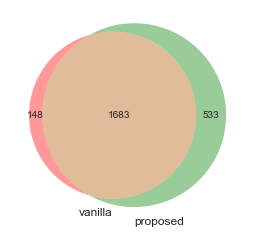

In [196]:
from matplotlib_venn import venn3
vanilla = load_vanilla_egenes('real', fdr=0.10)
proposed = load_randomization_egenes('real', fdr=0.10)
venn2([vanilla, proposed], ["vanilla", "proposed"])
plt.show()